### Four Types of Analytics
![chart](../images/4-types-of-data-analytics-01.png)

In [1]:
#from shapely.geometry import Point
import pandas as pd
import numpy as np
import math
import geopandas as gpd
#geopandas reads files with the `read_file()` method
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
%matplotlib inline
!pip install pysal
import pysal.viz.mapclassify as mc
#!pip install seaborn
#!pip install plotly
#import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [2 lines of output]
  INFO:root:Building on Windows requires extra options to setup.py to locate needed GDAL files. More information is available in the README.
  ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

Getting requirements to build wheel did not run successfully.
exit code: 1

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


  Using cached pysal-2.6.0-py3-none-any.whl (17 kB)
  Using cached pointpats-2.2.0.tar.gz (55 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached momepy-0.5.3-py3-none-any.whl (243 kB)
  Using cached giddy-2.3.3-py3-none-any.whl (60 kB)
  Using cached segregation-2.2.3-py3-none-any.whl (147 kB)
  Using cached spglm-1.0.8.tar.gz (37 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached spint-1.0.7.tar.gz (28 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 85.0/85.0 KB 4.7 MB/s eta 0:00:00
  Using cached esda-2.4.1.tar.gz (95 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached spaghetti-1.6.5-py3-none-any.whl (46 kB)
  Using cached mgwr-2.1.2.tar.gz (41 kB)
  Preparing metadata (setup

ModuleNotFoundError: No module named 'pysal'

#### Let's get some data and take a look

In [2]:
NSSCrisis1_df = pd.read_csv('../Data/NSSCrisisv.1.csv')

C:\Users\scott\AppData\Local\Temp\ipykernel_39524\3429112011.py:1: DtypeWarning: Columns (0,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,26,27,28,29,31,35,36,37,38,39,40,41,42,43,44,45,48,51,54,55,56,57,58,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,88,89,92,93,94,95,96,97,102,103,104,105,106,107,108,113,117,120,121,122,124,128,136,140,141,142,143,144,145,146,148,152,153,154,155,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,259,261,262,263,264,265,266,267,268,269,270,271,272,273,281,282,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311) have mixed types. Specify dtype option on import or set low_memory=False.
  NSSCrisis1_df = pd.re

In [3]:
NSSCrisis2_df = pd.read_csv('../Data/NSSCrisisv.2.csv')

C:\Users\scott\AppData\Local\Temp\ipykernel_39524\770683665.py:1: DtypeWarning: Columns (0,5,6,7,9,10,11,12,13,14,15,16,20,21,22,23,24,25,26,29,30,31,32,34,35,38,39,40,41,42,43,44,45,46,47,48,51,54,57,58,59,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,92,101,111,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,177,178,179,180,181,182,183,184,185,186,187,188,189,213,215,216,217,218,219,220,221,222,223,224,225,226,227,235,236,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257) have mixed types. Specify dtype option on import or set low_memory=False.
  NSSCrisis2_df = pd.read_csv('../Data/NSSCrisisv.2.csv')


In [4]:
CallCenter_2020 = pd.read_csv('../data/Contact_center_call_volume_2020.csv')

In [5]:
CallCenter_2021 = pd.read_csv('../data/Contact_center_call_volume_2021.csv')

In [6]:
CallCenter_2022 = pd.read_csv('../data/Contact center call volume_2022.csv')

In [7]:
NSSCrisis1_df.shape

(52878, 312)

In [8]:
NSSCrisis2_df.shape

(10650, 261)

In [9]:
CallCenter_2020.shape

(104, 11)

In [10]:
CallCenter_2021.shape

(117, 11)

In [11]:
CallCenter_2022.shape

(104, 11)

In [12]:
NSSCrisis1_df.head()

FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:57 AM.  \
0                                                                                             
1                                      CallReportNum                                          
2                                           96627022                                          
3                                           96626934                                          
4                                           96626654                                          

      Unnamed: 1             Unnamed: 2            Unnamed: 3  \
0            NaN                    NaN                   NaN   
1  ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart   
2         Crisis                    NaN      12/31/2021 23:35   
3         Crisis                    NaN      12/31/2021 23:29   
4         Crisis                    NaN      12/31/2021 23:07   

           Unnamed: 4  Unnamed: 5 Unnamed: 6      Unnamed: 7       Unnamed: 8  \
0                 NaN         NaN        NaN             NaN              NaN   
1  CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum  PhoneWorkerName   
2    12/31/2021 23:58          23         -1          136748    Lisa Crawford   
3    12/31/2021 23:35           6         -1          136748    Lisa Crawford   
4    12/31/2021 23:28          21    1030262          136748    Lisa Crawford   

    Unnamed: 9  ...                                       Unnamed: 302  \
0          NaN  ...                                                NaN   
1  WasRealCall  ...  SUI AX Third-Party Risk Assessment Demographic...   
2          NaN  ...                                                NaN   
3          NaN  ...                                                NaN   
4          NaN  ...                                                NaN   

                                        Unnamed: 303  \
0                                                NaN   
1  SUI AX Third-Party Risk Assessment Demographic...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Unnamed: 304  \
0                                                NaN   
1  Suicide Assessment - Are you thinking of suicide?   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Unnamed: 305  \
0                                                NaN   
1  Suicide Assessment - Caller is having thoughts...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                 Unnamed: 306  \
0                                         NaN   
1  Suicide Assessment - Do you own a firearm?   
2                                         NaN   
3                                         NaN   
4                                         NaN   

                                        Unnamed: 307  \
0                                                NaN   
1  Suicide Assessment - Have you ever attempted t...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Unnamed: 308  \
0                                                NaN   
1  Suicide Assessment - Have you thought about su...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                Unnamed: 309  \
0                                        NaN   
1  Suicide Assessment - Suicide 

In [13]:
header_row = 1

In [14]:
NSSCrisis1_df.columns = NSSCrisis1_df.iloc[header_row]

In [15]:
NSSCrisis1_df = NSSCrisis1_df.drop(header_row)

In [16]:
NSSCrisis1_df = NSSCrisis1_df.reset_index(drop=True)
NSSCrisis1_df.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                         NaN                   NaN                  NaN   
1      96627022        Crisis                   NaN     12/31/2021 23:35   
2      96626934        Crisis                   NaN     12/31/2021 23:29   
3      96626654        Crisis                   NaN     12/31/2021 23:07   
4      96626370        Crisis                   NaN     12/31/2021 22:45   

1 CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum PhoneWorkerName  \
0                NaN        NaN       NaN            NaN             NaN   
1   12/31/2021 23:58         23        -1         136748   Lisa Crawford   
2   12/31/2021 23:35          6        -1         136748   Lisa Crawford   
3   12/31/2021 23:28         21   1030262         136748   Lisa Crawford   
4   12/31/2021 22:55         10   2479348         136748   Lisa Crawford   

1 WasRealCall  ... SUI AX Third-Party Risk Assessment Demographics - Income  \
0         NaN  ...                                                NaN         
1         NaN  ...                                                NaN         
2         NaN  ...                                                NaN         
3         NaN  ...                                                NaN         
4         NaN  ...                                                NaN         

1 SUI AX Third-Party Risk Assessment Demographics - SUI AX Does this risk assesment have different demographics than the caller? (Third-party Call)  \
0                                                NaN                                                                                                  
1                                                NaN                                                                                                  
2                                                NaN                                                                                                  
3                                                NaN                                                                                                  
4                                                NaN                                                                                                  

1 Suicide Assessment - Are you thinking of suicide?  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

1 Suicide Assessment - Caller is having thoughts of killing self or other  \
0                                                NaN                        
1                                                NaN                        
2                                                NaN                        
3                                                NaN                        
4                                                NaN                        

1 Suicide Assessment - Do you own a firearm?  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

1 Suicide Assessment - Have you ever attempted to kill yourself?  \
0                                                NaN               
1                                                NaN               
2                                                NaN               
3                                                NaN               
4                                                NaN               

1 Suicide Assessment - Have you thought about suicide in the last two months?  \
0                                                NaN                            
1                                                N

In [17]:
NSSCrisis2_df.head()

FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:58 AM.  \
0                                                                                             
1                                      CallReportNum                                          
2                                          101384892                                          
3                                          101384348                                          
4                                          101383635                                          

      Unnamed: 1             Unnamed: 2            Unnamed: 3  \
0            NaN                    NaN                   NaN   
1  ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart   
2     Crisis v.2                    NaN         4/30/22 23:19   
3     Crisis v.2                    NaN         4/30/22 22:46   
4     Crisis v.2                    NaN         4/30/22 22:03   

           Unnamed: 4  Unnamed: 5 Unnamed: 6      Unnamed: 7       Unnamed: 8  \
0                 NaN         NaN        NaN             NaN              NaN   
1  CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum  PhoneWorkerName   
2       4/30/22 23:27           8    1025380           55599  Darren Anderson   
3       4/30/22 23:13          27         -1           55599  Darren Anderson   
4       4/30/22 22:27          24         -1          169061   Tandra Freeman   

    Unnamed: 9  ...                                       Unnamed: 251  \
0          NaN  ...                                                NaN   
1  WasRealCall  ...  SUI AX Phone Line - SAMHSA - Was the offer for...   
2          NaN  ...                                                NaN   
3          NaN  ...                                                NaN   
4          NaN  ...                                                NaN   

                                 Unnamed: 252  \
0                                         NaN   
1  SUI AX Reassessment - Change in Risk Level   
2                                         NaN   
3                                         NaN   
4                                         NaN   

                                        Unnamed: 253  \
0                                                NaN   
1  SUI AX Reassessment - Initial Suicide Risk Ass...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                    Unnamed: 254  \
0                                            NaN   
1  SUI AX Reassessment - Is this a Reassessment?   
2                                            NaN   
3                                            NaN   
4                                            NaN   

                                       Unnamed: 255  \
0                                               NaN   
1  SUI AX Reassessment - Suicide Risk Re-assessment   
2                                               NaN   
3                                               NaN   
4                                               NaN   

                                        Unnamed: 256  \
0                                                NaN   
1  SUI AX Third-Party Risk Assessment Demographic...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Unnamed: 257  \
0                                                NaN   
1  SUI AX Third-Party Risk Assessment Demographic...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Unnamed: 258  \
0                                                NaN   
1  Suicide Imminent Risk - Third party suicide

In [18]:
NSSCrisis2_df.columns = NSSCrisis2_df.iloc[header_row]

In [19]:
NSSCrisis2_df = NSSCrisis2_df.drop(header_row)

In [20]:
NSSCrisis2_df = NSSCrisis2_df.reset_index(drop=True)
NSSCrisis2_df.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                         NaN                   NaN                  NaN   
1     101384892    Crisis v.2                   NaN        4/30/22 23:19   
2     101384348    Crisis v.2                   NaN        4/30/22 22:46   
3     101383635    Crisis v.2                   NaN        4/30/22 22:03   
4     101383441    Crisis v.2                   NaN        4/30/22 21:52   

1 CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  PhoneWorkerName  \
0                NaN        NaN       NaN            NaN              NaN   
1      4/30/22 23:27          8   1025380          55599  Darren Anderson   
2      4/30/22 23:13         27        -1          55599  Darren Anderson   
3      4/30/22 22:27         24        -1         169061   Tandra Freeman   
4      4/30/22 22:15         23        -1         170047       Jane Davis   

1 WasRealCall  ...  \
0         NaN  ...   
1         NaN  ...   
2         NaN  ...   
3         NaN  ...   
4         NaN  ...   

1 SUI AX Phone Line - SAMHSA - Was the offer for follow-up accepted?  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4                                                NaN                   

1 SUI AX Reassessment - Change in Risk Level  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

1 SUI AX Reassessment - Initial Suicide Risk Assessment  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

1 SUI AX Reassessment - Is this a Reassessment?  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

1 SUI AX Reassessment - Suicide Risk Re-assessment  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

1 SUI AX Third-Party Risk Assessment Demographics - Income  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

1 SUI AX Third-Party Risk Assessment Demographics - SUI AX Does this risk assesment have different demographics than the caller? (Third-party Call)  \
0                                                NaN                                                                                                  
1                                                NaN                                                                                                  
2                                                NaN                                                                                                  
3                                                NaN                                                                                                  
4                                                NaN                                                          

In [21]:
NSSCrisis_df = pd.concat([NSSCrisis1_df, NSSCrisis2_df], axis=0, ignore_index=True)

In [22]:
NSSCrisis_df.shape

(63526, 372)

In [23]:
NSSCrisis_df.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                         NaN                   NaN                  NaN   
1      96627022        Crisis                   NaN     12/31/2021 23:35   
2      96626934        Crisis                   NaN     12/31/2021 23:29   
3      96626654        Crisis                   NaN     12/31/2021 23:07   
4      96626370        Crisis                   NaN     12/31/2021 22:45   

1 CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum PhoneWorkerName  \
0                NaN        NaN       NaN            NaN             NaN   
1   12/31/2021 23:58         23        -1         136748   Lisa Crawford   
2   12/31/2021 23:35          6        -1         136748   Lisa Crawford   
3   12/31/2021 23:28         21   1030262         136748   Lisa Crawford   
4   12/31/2021 22:55         10   2479348         136748   Lisa Crawford   

1 WasRealCall  ...  \
0         NaN  ...   
1         NaN  ...   
2         NaN  ...   
3         NaN  ...   
4         NaN  ...   

1 Debrief Request - Request to review contact with a peer/supervisor  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4                                                NaN                   

1 Homicide Imminent Risk - Please indicate category: (Choose all that apply)  \
0                                                NaN                           
1                                                NaN                           
2                                                NaN                           
3                                                NaN                           
4                                                NaN                           

1 Homicide Imminent Risk - Third party homicide call emergency rescue dispatched?  \
0                                                NaN                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

1 Homicide Imminent Risk - Was emergency rescue dispatched?  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

1 Homicide Imminent Risk - Was homicidal ideation present?  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

1 NSPL Phone Line - Did you complete a warm transfer to the Veterans Crisis Line?  \
0                                                NaN                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

1 NSPL Phone Line - If Veteran why didnt they press 1 for Veterans?  \
0                                                NaN                  
1                                                NaN                  
2                                                NaN

In [24]:
CallCenter_df_temp = pd.concat([CallCenter_2020, CallCenter_2021], axis=0, ignore_index=True)

In [25]:
CallCenter_df_temp.shape

(221, 11)

In [26]:
CallCenter_df = pd.concat([CallCenter_df_temp, CallCenter_2022], axis=0, ignore_index=True)

In [27]:
CallCenter_df.shape

(325, 13)

In [28]:
NSSCrisis_df.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                         NaN                   NaN                  NaN   
1      96627022        Crisis                   NaN     12/31/2021 23:35   
2      96626934        Crisis                   NaN     12/31/2021 23:29   
3      96626654        Crisis                   NaN     12/31/2021 23:07   
4      96626370        Crisis                   NaN     12/31/2021 22:45   

1 CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum PhoneWorkerName  \
0                NaN        NaN       NaN            NaN             NaN   
1   12/31/2021 23:58         23        -1         136748   Lisa Crawford   
2   12/31/2021 23:35          6        -1         136748   Lisa Crawford   
3   12/31/2021 23:28         21   1030262         136748   Lisa Crawford   
4   12/31/2021 22:55         10   2479348         136748   Lisa Crawford   

1 WasRealCall  ...  \
0         NaN  ...   
1         NaN  ...   
2         NaN  ...   
3         NaN  ...   
4         NaN  ...   

1 Debrief Request - Request to review contact with a peer/supervisor  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4                                                NaN                   

1 Homicide Imminent Risk - Please indicate category: (Choose all that apply)  \
0                                                NaN                           
1                                                NaN                           
2                                                NaN                           
3                                                NaN                           
4                                                NaN                           

1 Homicide Imminent Risk - Third party homicide call emergency rescue dispatched?  \
0                                                NaN                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

1 Homicide Imminent Risk - Was emergency rescue dispatched?  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

1 Homicide Imminent Risk - Was homicidal ideation present?  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

1 NSPL Phone Line - Did you complete a warm transfer to the Veterans Crisis Line?  \
0                                                NaN                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

1 NSPL Phone Line - If Veteran why didnt they press 1 for Veterans?  \
0                                                NaN                  
1                                                NaN                  
2                                                NaN

In [29]:
#header_row = 1

In [30]:
#NSSCrisis_df.columns = NSSCrisis_df.iloc[header_row]

In [31]:
#NSSCrisis_df = NSSCrisis_df.drop(header_row)

In [32]:
NSSCrisis_df = NSSCrisis_df.drop(0)

In [33]:
NSSCrisis_df = NSSCrisis_df.reset_index(drop=True)

In [34]:
NSSCrisis_df.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0      96627022        Crisis                   NaN     12/31/2021 23:35   
1      96626934        Crisis                   NaN     12/31/2021 23:29   
2      96626654        Crisis                   NaN     12/31/2021 23:07   
3      96626370        Crisis                   NaN     12/31/2021 22:45   
4      96625909        Crisis                   NaN     12/31/2021 22:15   

1 CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum PhoneWorkerName  \
0   12/31/2021 23:58         23        -1         136748   Lisa Crawford   
1   12/31/2021 23:35          6        -1         136748   Lisa Crawford   
2   12/31/2021 23:28         21   1030262         136748   Lisa Crawford   
3   12/31/2021 22:55         10   2479348         136748   Lisa Crawford   
4   12/31/2021 22:44         29        -1         136748   Lisa Crawford   

1 WasRealCall  ...  \
0         NaN  ...   
1         NaN  ...   
2         NaN  ...   
3         NaN  ...   
4         NaN  ...   

1 Debrief Request - Request to review contact with a peer/supervisor  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4                                                NaN                   

1 Homicide Imminent Risk - Please indicate category: (Choose all that apply)  \
0                                                NaN                           
1                                                NaN                           
2                                                NaN                           
3                                                NaN                           
4                                                NaN                           

1 Homicide Imminent Risk - Third party homicide call emergency rescue dispatched?  \
0                                                NaN                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

1 Homicide Imminent Risk - Was emergency rescue dispatched?  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

1 Homicide Imminent Risk - Was homicidal ideation present?  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

1 NSPL Phone Line - Did you complete a warm transfer to the Veterans Crisis Line?  \
0                                                NaN                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

1 NSPL Phone Line - If Veteran why didnt they press 1 for Veterans?  \
0                                                NaN                  
1                                                NaN                  
2                                                NaN

In [35]:
print(list(NSSCrisis_df.columns))

['CallReportNum', 'ReportVersion', 'LinkedToCallReportNum', 'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'CallLength', 'CallerNum', 'PhoneWorkerNum', 'PhoneWorkerName', 'WasRealCall', 'WasHangup', 'WasSexCall', 'WasWrongNumber', 'WasPrankCall', 'WasSilentCall', 'GeoCode', 'GeoAssignment', 'PostalCode', 'CensusDivision', 'CensusTrack', 'CensusReportingArea', '211Region', 'PhoneExtension', 'PhoneType', 'ThirdPartyName', 'ThirdPartyOrganization', 'ThirdPartyPhoneNumber', 'ThirdPartyAddress', 'ThirdPartyCity', 'ThirdPartyCounty', 'ThirdPartyStateProvince', 'ThirdPartyPostalCode', 'Narrative', 'VolunteerComments', 'Feedback', 'CallersFeedback', 'TextField2', 'TextField3', 'TextField4', 'TextField5', 'TextField6', 'TextField7', 'TextField8', 'TextField9', 'TextField10', 'EnteredByWorkerNum', 'EnteredByName', 'EnteredOn', 'Supervisor', 'Reviewed', 'FeedbackStatus', 'FeedbackFromPhoneWorkerNum', 'FeedbackFromPhoneWorkerName', 'ReferralsMade', 'IPAddress', 'OrgNum', 'VolIdentifier', 'CRISIS De

In [36]:
#index shows column index -- can be used to exclude columns with nan data
idx_dic = {}
for col in NSSCrisis_df.columns:
    idx_dic[col] = 63528 - NSSCrisis_df[col].isna().sum()
#print(idx_dic)
index_col_nan = pd.DataFrame(list(idx_dic.items()),columns = ['col_name','num_good_data'])
index_col_nan['%'] = ((index_col_nan['num_good_data'])/63528)*100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
index_col_nan
#pd.reset_option('all')

col_name  \
0                                                                                                                                        CallReportNum   
1                                                                                                                                        ReportVersion   
2                                                                                                                                LinkedToCallReportNum   
3                                                                                                                                 CallDateAndTimeStart   
4                                                                                                                                   CallDateAndTimeEnd   
5                                                                                                                                           CallLength   
6                                                                                                                                            CallerNum   
7                                                                                                                                       PhoneWorkerNum   
8                                                                                                                                      PhoneWorkerName   
9                                                                                                                                          WasRealCall   
10                                                                                                                                           WasHangup   
11                                                                                                                                          WasSexCall   
12                                                                                                                                      WasWrongNumber   
13                                                                                                                                        WasPrankCall   
14                                                                                                                                       WasSilentCall   
15                                                                                                                                             GeoCode   
16                                                                                                                                       GeoAssignment   
17                                                                                                                                          PostalCode   
18                                                                                                                                      CensusDivision   
19                                                                                                                                         CensusTrack   
20                                                                                                                                 CensusReportingArea   
21                                                                                                                                           211Region   
22                                                                                                                                      PhoneExtension   
23                                                                                                                                           PhoneType   
24                                                                                                                                      ThirdPartyName   
25                                                                                                                              ThirdParty

In [37]:
good_data_df = index_col_nan.sort_values(['%'], ascending=[False])
good_data_df

col_name  \
0                                                                                                                                        CallReportNum   
55                                                                                                                                              OrgNum   
45                                                                                                                                  EnteredByWorkerNum   
3                                                                                                                                 CallDateAndTimeStart   
4                                                                                                                                   CallDateAndTimeEnd   
5                                                                                                                                           CallLength   
6                                                                                                                                            CallerNum   
7                                                                                                                                       PhoneWorkerNum   
8                                                                                                                                      PhoneWorkerName   
46                                                                                                                                       EnteredByName   
47                                                                                                                                           EnteredOn   
1                                                                                                                                        ReportVersion   
49                                                                                                                                            Reviewed   
50                                                                                                                                      FeedbackStatus   
98                                                                                                                 CRISIS Call Information - Call Type   
101                                                                                                               CRISIS Call Information - Phone Line   
119                                                                                                                     CRISIS Demographics - Military   
91                                                                            CRISIS Assessment - Did you complete a Suicide Assessment for this call?   
90                                                                     CRISIS Assessment - Did you complete a Homicidal Risk Assessment for this call?   
147                                                                                                     CRISIS Successful Outcome - Successful Outcome   
32                                                                                                                                           Narrative   
112                                                                                                              CRISIS Demographics - Gender Identity   
34                                                                                                                                            Feedback   
125                                                                                                                    CRISIS Issues - Emotional State   
51                                                                                                                          FeedbackFromPhoneWorkerNum   
52                                                                                                                         FeedbackFromPho

In [38]:
NSSCrisis_df['PostalCode'].value_counts()
#df2=df[df['Fee']==22000]['Courses'].values[0]

37075.0    936
37115.0    733
38012.0    666
37211.0    627
37115      562
37013.0    551
37138.0    548
37857.0    522
37075      517
37207.0    484
38012      459
37138      379
37238.0    369
37857      350
37013      321
37211      318
37130.0    311
53715.0    287
37207      286
37307.0    274
37030.0    269
37238      246
37087.0    219
53715      184
37212.0    179
37210.0    178
37130      168
37307      167
37201.0    165
37379.0    137
37210      135
37072.0    133
37030      125
37087      124
37027.0    118
37212      116
37072      110
37208.0    108
38506.0    108
37219.0    107
37201       96
37202.0     88
37206.0     79
75212.0     79
37217.0     79
37076.0     76
37379       76
37931.0     76
37929.0     72
55311       72
38703.0     71
37129.0     70
37203.0     68
37090.0     67
37215.0     66
37208       66
37219       65
38558.0     64
37067.0     62
55311.0     60
37421.0     58
37027       58
37421       57
37215       56
7105.0      56
38506       54
37205.0   

In [39]:
NSSCrisis_df['CRISIS Demographics - Military'].value_counts(normalize=True)

Unknown                            0.626973
N/A (did not serve)                0.339439
Veteran                            0.029023
Family of Military                 0.002365
Active Duty                        0.001448
3rd Party Calling about Veteran    0.000477
Reserves/National Guard            0.000275
Name: CRISIS Demographics - Military, dtype: float64

In [40]:
NSSCrisis_df['CRISIS Demographics - Gender Identity'].value_counts()

Female                                    23612
Male                                      17955
Transgender                                  97
Unidentified                                 94
Transgender Female                           20
Genderqueer                                  11
Transgender Male                             10
Gender Unknown                               10
Non sure gender identity (questioning)        5
Transgender (non-specified)                   4
Non-Binary                                    2
Name: CRISIS Demographics - Gender Identity, dtype: int64

### 1. Examine call volume and identify surge times, seasons, or events.

In [41]:
#Read first row
NSSCrisis_df.iloc[0]

1
CallReportNum                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     96627022
ReportVersion                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [42]:
NSSCrisis_df['Year'] = NSSCrisis_df['CallDateAndTimeStart'].str.extract('\d{2}/\d{2}/(\d{4})', expand=True)
NSSCrisis_df['Year'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: Year, dtype: object

In [43]:
NSSCrisis_df['Date'] = NSSCrisis_df['CallDateAndTimeStart'].str.extract('(\d{2}/\d{2}/\d{4})', expand=True)
NSSCrisis_df['Date'].head()

0    12/31/2021
1    12/31/2021
2    12/31/2021
3    12/31/2021
4    12/31/2021
Name: Date, dtype: object

In [44]:
NSSCrisis_df['Day'] = NSSCrisis_df['CallDateAndTimeStart'].str.extract('\d{2}/(\d{2})/\d{4}', expand=True)
NSSCrisis_df['Day'].head()

0    31
1    31
2    31
3    31
4    31
Name: Day, dtype: object

In [45]:
NSSCrisis_df['Month'] = NSSCrisis_df['CallDateAndTimeStart'].str.extract('(\d{2})/\d{2}/\d{4}', expand=True)
NSSCrisis_df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: object

### 3. Assess regional and demographic trends in call content and call volume.

In [46]:
call_counts = pd.DataFrame(NSSCrisis_df['CallerNum'].value_counts().reset_index().values, columns=['call_num', 'Count'])
call_counts_index = call_counts.sort_index(axis=0, ascending=True)
call_counts_index.head()
#for loop to group call volume into buckets
def assign_length(row):
    if row <= 20:
        result = "2 - 20 calls"
    elif row <= 50:
        result = "21 - 50 calls"
    elif row <= 100:
        result = "51 - 100 calls"
    elif row <= 250:
        result = "101 - 250 calls"
    elif row <= 500:
        result = "251 - 500 calls"
    elif row <= 750:
        result = "501 - 750 calls"
    elif row <= 1000:
        result = "751 - 1000 calls"
    else:
        result = "More than 1000 calls"
    return result
call_counts_index['Call_Volume_Group'] = call_counts_index['Count'].apply(assign_length)
call_counts_index.head(10)

call_num  Count     Call_Volume_Group
0       -1  42805  More than 1000 calls
1       -1   3049  More than 1000 calls
2  1155260   1308  More than 1000 calls
3  2270935   1156  More than 1000 calls
4  1033478   1060  More than 1000 calls
5  3620809    835      751 - 1000 calls
6  1030347    819      751 - 1000 calls
7  1025380    817      751 - 1000 calls
8  1029822    749       501 - 750 calls
9  1314449    740       501 - 750 calls

In [47]:
extracted_col = NSSCrisis_df["PostalCode"]

In [48]:
call_counts_index = call_counts_index.join(extracted_col)
call_counts_index.head()

call_num  Count     Call_Volume_Group PostalCode
0       -1  42805  More than 1000 calls        NaN
1       -1   3049  More than 1000 calls      37211
2  1155260   1308  More than 1000 calls        NaN
3  2270935   1156  More than 1000 calls      37098
4  1033478   1060  More than 1000 calls        NaN

In [49]:
#NSSCrisis_df = NSSCrisis_df.reset_index(drop=True)
NSSCrisis_df.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0      96627022        Crisis                   NaN     12/31/2021 23:35   
1      96626934        Crisis                   NaN     12/31/2021 23:29   
2      96626654        Crisis                   NaN     12/31/2021 23:07   
3      96626370        Crisis                   NaN     12/31/2021 22:45   
4      96625909        Crisis                   NaN     12/31/2021 22:15   

1 CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum PhoneWorkerName  \
0   12/31/2021 23:58         23        -1         136748   Lisa Crawford   
1   12/31/2021 23:35          6        -1         136748   Lisa Crawford   
2   12/31/2021 23:28         21   1030262         136748   Lisa Crawford   
3   12/31/2021 22:55         10   2479348         136748   Lisa Crawford   
4   12/31/2021 22:44         29        -1         136748   Lisa Crawford   

1 WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
0         NaN       NaN        NaN            NaN          NaN           NaN   
1         NaN       NaN        NaN            NaN          NaN           NaN   
2         NaN       NaN        NaN            NaN          NaN           NaN   
3         NaN       NaN        NaN            NaN          NaN           NaN   
4         NaN       NaN        NaN            NaN          NaN           NaN   

1 GeoCode GeoAssignment PostalCode CensusDivision CensusTrack  \
0     NaN           NaN        NaN            NaN         NaN   
1     NaN           NaN      37211            NaN         NaN   
2     NaN           NaN        NaN            NaN         NaN   
3     NaN           NaN      37098            NaN         NaN   
4     NaN           NaN        NaN            NaN         NaN   

1 CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
0                 NaN       NaN            NaN       NaN            NaN   
1                 NaN       NaN            NaN       NaN            NaN   
2                 NaN       NaN            NaN       NaN            NaN   
3                 NaN       NaN            NaN       NaN            NaN   
4                 NaN       NaN            NaN       NaN            NaN   

1 ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
0                    NaN                   NaN               NaN   
1                    NaN                   NaN               NaN   
2                    NaN                   NaN               NaN   
3                    NaN                   NaN               NaN   
4                    NaN                   NaN               NaN   

1 ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
0            NaN              NaN                     NaN   
1            NaN              NaN                      TN   
2            NaN              NaN                      TN   
3            NaN              NaN                      TN   
4            NaN              NaN                     NaN   

1 ThirdPartyPostalCode  \
0                  NaN   
1                  NaN   
2                  NaN   
3                  NaN   
4                  NaN   

1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Narrative  \
0                                                                                                                                                          

In [50]:
#Looking at Military Data
NSSCrisis_df.groupby(['CRISIS Demographics - Military','Year'])['CallReportNum'].count()

CRISIS Demographics - Military   Year
3rd Party Calling about Veteran  2020       2
                                 2021       3
Active Duty                      2020       4
                                 2021      12
Family of Military               2020       7
                                 2021       6
N/A (did not serve)              2020    1289
                                 2021    1664
Reserves/National Guard          2021       1
Unknown                          2020    2495
                                 2021    2682
Veteran                          2020     104
                                 2021     108
Name: CallReportNum, dtype: int64

In [51]:
NSSCrisis_df.CallerNum.

SyntaxError: invalid syntax (2831469113.py, line 1)

In [52]:
NSSCrisis_df.groupby(['PostalCode','CallerNum'])['CallerNum'].count().sort_values(ascending=False)

PostalCode  CallerNum
37075.0     1155260      890
38012.0     1033478      660
37013.0     -1           549
37211.0     -1           522
37857.0     1030347      509
37138.0     1029822      453
37207.0     -1           450
37075       1155260      413
37115.0     3048547      407
38012       1033478      396
37238.0     -1           330
37857       1030347      297
37138       1029822      280
53715.0     2003009      279
37013       -1           272
37307.0     3425890      266
37030.0     3346390      251
37207       -1           241
37115       3048547      219
37211       -1           217
37238       -1           205
37087.0     1030301      187
37212.0     -1           178
37115.0     1033354      168
53715       2003009      159
37130.0     1144311      158
37115       1033354      153
37379.0     -1           137
37115.0     -1           132
37130.0     -1           125
37201.0     -1           125
37072.0     -1           108
37219.0     -1           107
37130       1144311  

In [53]:
NSSCrisis_df.PostalCode.head(10)

0      NaN
1    37211
2      NaN
3    37098
4      NaN
5      NaN
6    53715
7    38012
8      NaN
9    22030
Name: PostalCode, dtype: object

In [54]:
NSSCrisis_df.PostalCode.dtypes

dtype('O')

In [55]:
NSSCrisis_df['PostalCode'] = pd.to_numeric(NSSCrisis_df['PostalCode'], errors='coerce')

In [56]:
NSSCrisis_df = NSSCrisis_df.dropna(subset=['PostalCode'])

In [57]:
NSSCrisis_df.PostalCode.head()

1    37211.0
3    37098.0
6    53715.0
7    38012.0
9    22030.0
Name: PostalCode, dtype: float64

In [58]:
NSSCrisis_df.PostalCode.dtype

dtype('float64')

In [59]:
#save this method ... astype int did not work
NSSCrisis_df = NSSCrisis_df.astype({'PostalCode':'int'})

In [60]:
NSSCrisis_df.PostalCode.dtype

dtype('int32')

In [61]:
zip_calls = NSSCrisis_df['PostalCode'].value_counts().sort_values(ascending=False).rename_axis('zip_code').reset_index(name='num_calls')
zip_calls.head()

zip_code  num_calls
0     37075       1453
1     37115       1295
2     38012       1125
3     37211        945
4     37138        927

In [62]:
#add zip-median income data
tn_zip_median_income = pd.read_csv('../Data/tn_median_income_zip_transpose.csv')
tn_zip_median_income.head()

Zip_Code Median_Income  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0     37010        93,794         NaN         NaN         NaN         NaN   
1     37012        49,883         NaN         NaN         NaN         NaN   
2     37013        60,602         NaN         NaN         NaN         NaN   
3     37014       123,137         NaN         NaN         NaN         NaN   
4     37015        59,144         NaN         NaN         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1         NaN         NaN         NaN         NaN          NaN          NaN   
2         NaN         NaN         NaN         NaN          NaN          NaN   
3         NaN         NaN         NaN         NaN          NaN          NaN   
4         NaN         NaN         NaN         NaN          NaN          NaN   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  Unnamed: 26  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 27  Unnamed: 28  Unnamed: 29  Unnamed: 30  Unnamed: 31  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 32  Unnamed: 33  Unnamed: 34  Unnamed: 35  Unnamed: 36  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 37  Unnamed: 38  Unnamed: 39  Unnamed: 40  Unnamed: 41  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 42  Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 47  Unnamed: 48  Unnamed: 49  Unnamed: 50  Unnamed: 51  \
0          NaN          NaN          NaN        

In [63]:
tn_zip_median_income.drop(tn_zip_median_income.iloc[:, 2:631], inplace = True, axis = 1)
tn_zip_median_income.head()

Zip_Code Median_Income
0     37010        93,794
1     37012        49,883
2     37013        60,602
3     37014       123,137
4     37015        59,144

In [64]:
zip_calls.columns

Index(['zip_code', 'num_calls'], dtype='object')

In [65]:
tn_zip_median_income.columns

Index(['Zip_Code', 'Median_Income'], dtype='object')

In [66]:
#left join income to zip calls
zip_combined = zip_calls.merge(tn_zip_median_income, left_on='zip_code', right_on='Zip_Code', how='left')
zip_combined.drop(zip_combined.iloc[:, 2:3], inplace = True, axis = 1)
zip_combined.head()

zip_code  num_calls Median_Income
0     37075       1453        77,320
1     37115       1295        46,777
2     38012       1125        38,077
3     37211        945        59,075
4     37138        927        73,710

In [67]:
#remove commas from Medium_Income
zip_combined["Median_Income"] = [str(i).replace(",", "") for i in zip_combined["Median_Income"]]
zip_combined.head()

zip_code  num_calls Median_Income
0     37075       1453         77320
1     37115       1295         46777
2     38012       1125         38077
3     37211        945         59075
4     37138        927         73710

In [68]:
zip_combined.dtypes

zip_code          int64
num_calls         int64
Median_Income    object
dtype: object

In [69]:
zip_combined.astype({'num_calls':'float'})
zip_combined.dtypes

zip_code          int64
num_calls         int64
Median_Income    object
dtype: object

In [70]:
zip_combined['log_calls'] = np.log10(zip_combined['num_calls'])

In [71]:
zip_combined.dtypes

zip_code           int64
num_calls          int64
Median_Income     object
log_calls        float64
dtype: object

In [72]:
#change Median_Income to int
zip_combined['Median_Income'] = pd.to_numeric(zip_combined['Median_Income'], errors = 'coerce')

In [73]:
zip_combined.dtypes

zip_code           int64
num_calls          int64
Median_Income    float64
log_calls        float64
dtype: object

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


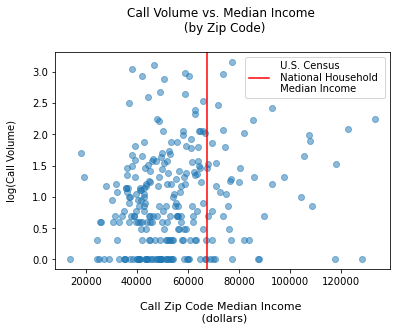

In [74]:
#create scatter plot of num_calls vs. median income for zip_combined
#percentage of songwriters not listed by decade
plt.scatter(zip_combined.Median_Income, zip_combined.log_calls, alpha=0.5, cmap="viridis")
#plt.barh(writer_listed['decade'], writer_listed['Percent_Listed_No'], color='black')
plt.ylabel('log(Call Volume)', fontsize=10, color='black', rotation=90, labelpad=15)
plt.title('Call Volume vs. Median Income \n (by Zip Code)', fontsize=12, fontname="Times New Roman Bold", color='black', pad=20)
#ax.set_title('T', pad=20)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Call Zip Code Median Income \n (dollars)', fontsize=11, color='black', rotation=0, labelpad=15)
plt.axvline(x=67521, color='r', linestyle='-', label=' U.S. Census \n National Household \n Median Income')
plt.legend(loc = 'upper right')
plt.savefig('median_income_v_calls_zip.png', dpi=200, transparent=False, bbox_inches='tight')
plt.show()

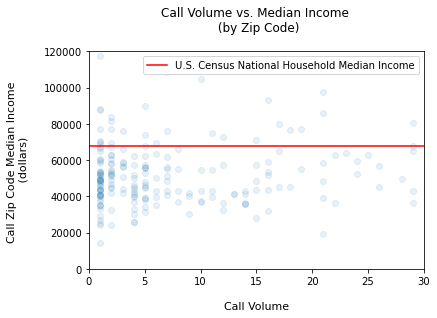

In [75]:
#reset axis range
plt.xlim(2, 8)
plt.ylim(-0.50,1.5)

#create scatter plot of num_calls vs. median income for zip_combined
#percentage of songwriters not listed by decade
plt.scatter(zip_combined.num_calls, zip_combined.Median_Income, alpha=0.1, cmap="viridis")
plt.xlim(0,30)
plt.ylim(0,120000)
#plt.barh(writer_listed['decade'], writer_listed['Percent_Listed_No'], color='black')
plt.xlabel('Call Volume', fontsize=11, color='black', rotation=0, labelpad=15)
plt.title('Call Volume vs. Median Income \n (by Zip Code)', fontsize=12, fontname="Times New Roman Bold", color='black', pad=20)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.ylabel('Call Zip Code Median Income \n (dollars)', fontsize=11, color='black', rotation=90, labelpad=15)
plt.axhline(y=67521, color='r', linestyle='-', label='U.S. Census National Household Median Income')
plt.legend(loc = 'upper right',)
#plt.savefig('percent_songwriter_not_listed_by_decade.png', transparent=False)
plt.show()

In [76]:
zip_combined.head(10)

zip_code  num_calls  Median_Income  log_calls
0     37075       1453        77320.0   3.162266
1     37115       1295        46777.0   3.112270
2     38012       1125        38077.0   3.051153
3     37211        945        59075.0   2.975432
4     37138        927        73710.0   2.967080
5     37857        872        42103.0   2.940516
6     37013        872        60602.0   2.940516
7     37207        770        50583.0   2.886491
8     37238        615            NaN   2.788875
9     37130        479        49229.0   2.680336

In [77]:
NSSCrisis_df[NSSCrisis_df['call_']

SyntaxError: unexpected EOF while parsing (2621843990.py, line 1)

In [78]:
#read in lat-long for zip codes
zip_lat_lng = pd.read_csv('../Data/US Zip Codes from 2013 Government Data.csv', dtype={"zip":"string"})
zip_lat_lng.head()

zip        lat        lng
0  00601  18.180555 -66.749961
1  00602  18.361945 -67.175597
2  00603  18.455183 -67.119887
3  00606  18.158345 -66.932911
4  00610  18.295366 -67.125135

In [79]:
zip_combined.dtypes

zip_code           int64
num_calls          int64
Median_Income    float64
log_calls        float64
dtype: object

In [80]:
zip_combined = zip_combined.astype({'zip_code':'str'})

In [81]:
zip_combined.dtypes

zip_code          object
num_calls          int64
Median_Income    float64
log_calls        float64
dtype: object

In [82]:
zip_lat_lng.dtypes

zip     string
lat    float64
lng    float64
dtype: object

In [83]:
#join lat-lng to zip_combined
zip_combined_spat = zip_combined.merge(zip_lat_lng, left_on='zip_code', right_on='zip', how='left')
zip_combined_spat.head()

zip_code  num_calls  Median_Income  log_calls    zip        lat        lng
0    37075       1453        77320.0   3.162266  37075  36.339969 -86.607922
1    37115       1295        46777.0   3.112270  37115  36.253847 -86.695530
2    38012       1125        38077.0   3.051153  38012  35.610611 -89.273232
3    37211        945        59075.0   2.975432  37211  36.067234 -86.723711
4    37138        927        73710.0   2.967080  37138  36.244014 -86.609391

In [84]:
zip_combined_spat.drop(zip_combined_spat.iloc[:, 3:4], inplace = True, axis = 1)
zip_combined_spat.head()

zip_code  num_calls  Median_Income    zip        lat        lng
0    37075       1453        77320.0  37075  36.339969 -86.607922
1    37115       1295        46777.0  37115  36.253847 -86.695530
2    38012       1125        38077.0  38012  35.610611 -89.273232
3    37211        945        59075.0  37211  36.067234 -86.723711
4    37138        927        73710.0  37138  36.244014 -86.609391

In [85]:
#read in Jason's file to get calls per population normalization for each zip code
zip_pop = pd.read_csv('../data/zip_pop.csv', dtype={"zip":"string"})
zip_pop.head()

zip       lat       lng       city state_id   state_name  zcta  \
0  00601  18.18027 -66.75266   Adjuntas       PR  Puerto Rico  True   
1  00602  18.36075 -67.17541     Aguada       PR  Puerto Rico  True   
2  00603  18.45744 -67.12225  Aguadilla       PR  Puerto Rico  True   
3  00606  18.16585 -66.93716    Maricao       PR  Puerto Rico  True   
4  00610  18.29110 -67.12243     Anasco       PR  Puerto Rico  True   

   parent_zcta  population  density  county_fips county_name  \
0          NaN     16773.0    100.5        72001    Adjuntas   
1          NaN     37083.0    472.1        72003      Aguada   
2          NaN     45652.0    513.2        72005   Aguadilla   
3          NaN      6231.0     54.3        72093     Maricao   
4          NaN     26502.0    275.7        72011      Añasco   

                                                  county_weights  \
0                                {"72001": 98.76, "72141": 1.24}   
1                                                 {"72003": 100}   
2                                {"72005": 99.76, "72099": 0.24}   
3                {"72093": 82.28, "72153": 11.67, "72121": 6.05}   
4  {"72011": 96.71, "72099": 2.81, "72083": 0.37, "72003": 0.11}   

                county_names_all          county_fips_all  imprecise  \
0                Adjuntas|Utuado              72001|72141      False   
1                         Aguada                    72003      False   
2                 Aguadilla|Moca              72005|72099      False   
3    Maricao|Yauco|Sabana Grande        72093|72153|72121      False   
4  Añasco|Moca|Las Marías|Aguada  72011|72099|72083|72003      False   

   military             timezone  
0     False  America/Puerto_Rico  
1     False  America/Puerto_Rico  
2     False  America/Puerto_Rico  
3     False  America/Puerto_Rico  
4     False  America/Puerto_Rico

In [86]:
zip_pop.drop(zip_pop.columns[[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17]], inplace = True, axis = 1)
#zip_pop.drop(zip_pop.iloc[:, 1:7])
zip_pop.head()

zip  population
0  00601     16773.0
1  00602     37083.0
2  00603     45652.0
3  00606      6231.0
4  00610     26502.0

In [87]:
zip_combined_spat.columns

Index(['zip_code', 'num_calls', 'Median_Income', 'zip', 'lat', 'lng'], dtype='object')

In [88]:
zip_combined_spat_norm = zip_combined_spat.merge(zip_pop, left_on='zip_code', right_on='zip', how='left')
zip_combined_spat_norm.head()

zip_code  num_calls  Median_Income  zip_x        lat        lng  zip_y  \
0    37075       1453        77320.0  37075  36.339969 -86.607922  37075   
1    37115       1295        46777.0  37115  36.253847 -86.695530  37115   
2    38012       1125        38077.0  38012  35.610611 -89.273232  38012   
3    37211        945        59075.0  37211  36.067234 -86.723711  37211   
4    37138        927        73710.0  37138  36.244014 -86.609391  37138   

   population  
0     68336.0  
1     39573.0  
2     12658.0  
3     75199.0  
4     23789.0

In [89]:
zip_combined_spat_norm.drop(zip_combined_spat_norm.columns[[5]], inplace=True, axis=1)
zip_combined_spat_norm.head()

zip_code  num_calls  Median_Income  zip_x        lat  zip_y  population
0    37075       1453        77320.0  37075  36.339969  37075     68336.0
1    37115       1295        46777.0  37115  36.253847  37115     39573.0
2    38012       1125        38077.0  38012  35.610611  38012     12658.0
3    37211        945        59075.0  37211  36.067234  37211     75199.0
4    37138        927        73710.0  37138  36.244014  37138     23789.0

In [90]:
zip_combined_spat_norm['norm_calls'] = (zip_combined_spat_norm['num_calls'] / zip_combined_spat_norm['population'])
zip_combined_spat_norm.head()
#sort_values(by=['col1'], ascending = False)

zip_code  num_calls  Median_Income  zip_x        lat  zip_y  population  \
0    37075       1453        77320.0  37075  36.339969  37075     68336.0   
1    37115       1295        46777.0  37115  36.253847  37115     39573.0   
2    38012       1125        38077.0  38012  35.610611  38012     12658.0   
3    37211        945        59075.0  37211  36.067234  37211     75199.0   
4    37138        927        73710.0  37138  36.244014  37138     23789.0   

   norm_calls  
0    0.021263  
1    0.032724  
2    0.088877  
3    0.012567  
4    0.038968

In [91]:
zip_combined_spat_norm.sort_values(by=['norm_calls'], ascending=False, inplace=True)
zip_combined_spat_norm.head(50)

zip_code  num_calls  Median_Income  zip_x        lat  zip_y  population  \
767     67260          1            NaN  67260  37.719376  67260         0.0   
259     30334          6            NaN  30334  33.748855  30334         0.0   
1154    63045          1            NaN  63045  38.769205  63045         0.0   
922     96850          1            NaN  96850  21.303768  96850         0.0   
203     37213         10            NaN  37213  36.166156  37213        40.0   
21      37219        172        85463.0  37219  36.166811  37219      1043.0   
16      37201        261        92827.0  37201  36.166001  37201      1745.0   
11      37307        441        58857.0  37307  35.174229  37307      4806.0   
2       38012       1125        38077.0  38012  35.610611  38012     12658.0   
197     90071         11            NaN  90071  34.052876  90071       152.0   
12      37030        394        44531.0  37030  36.271546  37030      7674.0   
44      42082         76            NaN  42082  36.919858  42082      1579.0   
5       37857        872        42103.0  37857  36.424289  37857     20429.0   
4       37138        927        73710.0  37138  36.244014  37138     23789.0   
10      53715        471            NaN  53715  43.068490  53715     13202.0   
1       37115       1295        46777.0  37115  36.253847  37115     39573.0   
116     36602         25            NaN  36602  30.693326  36602       919.0   
62      37012         50        49883.0  37012  36.073830  37012      1954.0   
84      37866         36        61462.0  37866  36.342062  37866      1508.0   
158     37057         15        27899.0  37057  36.418109  37057       660.0   
0       37075       1453        77320.0  37075  36.339969  37075     68336.0   
7       37207        770        50583.0  37207  36.233774  37207     39151.0   
14      37210        313        36985.0  37210  36.149263  37210     16810.0   
82      37408         37        63869.0  37408  35.028634  37408      2033.0   
15      37212        295        71699.0  37212  36.133877  37212     20672.0   
183     38554         12        32386.0  38554  36.249490  38554       842.0   
3       37211        945        59075.0  37211  36.067234  37211     75199.0   
120     37729         24        52083.0  37729  36.516651  37729      1937.0   
61      37402         50        18319.0  37402  35.043722  37402      4100.0   
54      37032         62        74760.0  37032  36.524214  37032      5227.0   
79      47406         38            NaN  47406  39.177797  47406      3404.0   
36      38558         98        57998.0  38558  36.009882  38558      9572.0   
48      37403         74        53393.0  37403  35.048259  37403      7484.0   
20      37208        174        47903.0  37208  36.177714  37208     18375.0   
58      37098         55        52570.0  37098  35.872364  37098      5904.0   
96      37352         31        64464.0  37352  35.277520  37352      3440.0   
6       37013        872        60602.0  37013  36.052231  37013     99109.0   
9       37130        479        49229.0  37130  35.881943  37130     57068.0   
38      38703         94            NaN  38703  33.475662  38703     11673.0   
17      37072        243        62655.0  37072  36.352140  37072     31134.0   
18      37379        213        62748.0  37379  35.295160  37379     28115.0   
13      37087        343        66141.0  37087  36.263852  37087     48478.0   
33      37090        106        66536.0  37090  36.111740  37090     15143.0   
413     20184          3            NaN  20184  39.000671  20184       436.0   
30      37203        113        58032.0  37203  36.149614  37203     16772.0   
228     24250          8            NaN  24250  36.756733  24250      1217.0   
51      38320         65        39394.0  38320  36.051656  38320     10593.0   
88      37220         34       117917.0  37220  36.068447  37220      5894.0   
22      38506        162        48661.0  38506  36.187107  38506     28818.0   
215  

In [92]:
zip_combined_spat_norm.replace([np.inf, -np.inf], np.nan, inplace=True)
zip_combined_spat_norm.head(75)

zip_code  num_calls  Median_Income  zip_x        lat  zip_y  population  \
767     67260          1            NaN  67260  37.719376  67260         0.0   
259     30334          6            NaN  30334  33.748855  30334         0.0   
1154    63045          1            NaN  63045  38.769205  63045         0.0   
922     96850          1            NaN  96850  21.303768  96850         0.0   
203     37213         10            NaN  37213  36.166156  37213        40.0   
21      37219        172        85463.0  37219  36.166811  37219      1043.0   
16      37201        261        92827.0  37201  36.166001  37201      1745.0   
11      37307        441        58857.0  37307  35.174229  37307      4806.0   
2       38012       1125        38077.0  38012  35.610611  38012     12658.0   
197     90071         11            NaN  90071  34.052876  90071       152.0   
12      37030        394        44531.0  37030  36.271546  37030      7674.0   
44      42082         76            NaN  42082  36.919858  42082      1579.0   
5       37857        872        42103.0  37857  36.424289  37857     20429.0   
4       37138        927        73710.0  37138  36.244014  37138     23789.0   
10      53715        471            NaN  53715  43.068490  53715     13202.0   
1       37115       1295        46777.0  37115  36.253847  37115     39573.0   
116     36602         25            NaN  36602  30.693326  36602       919.0   
62      37012         50        49883.0  37012  36.073830  37012      1954.0   
84      37866         36        61462.0  37866  36.342062  37866      1508.0   
158     37057         15        27899.0  37057  36.418109  37057       660.0   
0       37075       1453        77320.0  37075  36.339969  37075     68336.0   
7       37207        770        50583.0  37207  36.233774  37207     39151.0   
14      37210        313        36985.0  37210  36.149263  37210     16810.0   
82      37408         37        63869.0  37408  35.028634  37408      2033.0   
15      37212        295        71699.0  37212  36.133877  37212     20672.0   
183     38554         12        32386.0  38554  36.249490  38554       842.0   
3       37211        945        59075.0  37211  36.067234  37211     75199.0   
120     37729         24        52083.0  37729  36.516651  37729      1937.0   
61      37402         50        18319.0  37402  35.043722  37402      4100.0   
54      37032         62        74760.0  37032  36.524214  37032      5227.0   
79      47406         38            NaN  47406  39.177797  47406      3404.0   
36      38558         98        57998.0  38558  36.009882  38558      9572.0   
48      37403         74        53393.0  37403  35.048259  37403      7484.0   
20      37208        174        47903.0  37208  36.177714  37208     18375.0   
58      37098         55        52570.0  37098  35.872364  37098      5904.0   
96      37352         31        64464.0  37352  35.277520  37352      3440.0   
6       37013        872        60602.0  37013  36.052231  37013     99109.0   
9       37130        479        49229.0  37130  35.881943  37130     57068.0   
38      38703         94            NaN  38703  33.475662  38703     11673.0   
17      37072        243        62655.0  37072  36.352140  37072     31134.0   
18      37379        213        62748.0  37379  35.295160  37379     28115.0   
13      37087        343        66141.0  37087  36.263852  37087     48478.0   
33      37090        106        66536.0  37090  36.111740  37090     15143.0   
413     20184          3            NaN  20184  39.000671  20184       436.0   
30      37203        113        58032.0  37203  36.149614  37203     16772.0   
228     24250          8            NaN  24250  36.756733  24250      1217.0   
51      38320         65        39394.0  38320  36.051656  38320     10593.0   
88      37220         34       117917.0  37220  36.068447  37220      5894.0   
22      38506        162        48661.0  38506  36.187107  38506     28818.0   
215  

In [93]:
zip_combined_spat_norm.norm_calls.mean()

0.0017655346308585625

In [94]:
zip_combined_spat_norm.dtypes

zip_code          object
num_calls          int64
Median_Income    float64
zip_x             string
lat              float64
zip_y             string
population       float64
norm_calls       float64
dtype: object

In [95]:
#Veterans grouped by Zipcode
NSSCrisis_df.groupby(['CRISIS Demographics - Military','Year', 'PostalCode'])['CallReportNum'].count()

CRISIS Demographics - Military   Year  PostalCode
3rd Party Calling about Veteran  2020  37862           1
                                 2021  54660           1
Active Duty                      2020  82901           1
                                 2021  37013           1
Family of Military               2020  37042           1
                                       37075           1
                                       37129           1
                                       42262           1
                                 2021  37013           1
                                       84115           2
N/A (did not serve)              2020  10013           3
                                       22802           1
                                       27858           1
                                       30662           1
                                       33125           1
                                       35740           1
                                      

In [96]:
#Veterans grouped by Zipcode
NSSCrisis_df.groupby(['PostalCode'])['CallReportNum'].count()

PostalCode
968         1
1301       11
1543        1
1776        1
1902        1
1970        3
2035        1
2110        1
2111       18
2130        8
2302        1
2360        1
2703        1
2879        1
2907       28
3054        1
3063        1
3104        4
3801        7
3820        1
3833        1
3857        2
4074        1
4101        1
4102        1
4106        1
5001        1
5401        4
6010        1
6043        1
6152        1
6260        1
6611        1
6804        1
6855        1
7006        1
7023        1
7058       13
7083        1
7086        1
7105       76
7106        2
7109        1
7201        1
7307        1
7514        3
7662       13
7701        1
7740        1
7746        1
7757        4
7876        1
8033        1
8108        1
8542        2
8619        1
8757        8
8807        1
8837        1
8865        2
8876        6
8901        1
10004       1
10005       1
10013      16
10022       1
10098       5
10175       1
10452       2
10469       1
10522    

In [97]:
NSSCrisis_df[NSSCrisis_df['PostalCode'] == '38012'].groupby(['Year'])['CallReportNum'].count()

Series([], Name: CallReportNum, dtype: int64)

In [98]:
#looking at percentage of calls by zipcode
zip_count = NSSCrisis_df['PostalCode'].value_counts(normalize=False).sort_values(ascending=False)
zip_count

37075    1453
37115    1295
38012    1125
37211     945
37138     927
37857     872
37013     872
37207     770
37238     615
37130     479
53715     471
37307     441
37030     394
37087     343
37210     313
37212     295
37201     261
37072     243
37379     213
37027     176
37208     174
37219     172
38506     162
37202     142
55311     132
37215     122
75212     119
37129     118
37421     115
37217     114
37203     113
37076     113
37206     111
37090     106
37929     106
37931     105
38558      98
37067      96
38703      94
37214      84
38829      81
37077      79
37205      79
37450      77
42082      76
7105       76
37830      76
37303      76
37403      74
77057      74
37167      72
38320      65
37015      65
95110      63
37032      62
37086      62
37209      61
82901      56
37098      55
33125      54
74011      52
37402      50
37012      50
97007      49
66062      48
37055      48
37604      47
35811      47
75074      46
37064      45
37745      45
37909 

In [99]:
#Value counts after group by example
#NSSCrisis_df.groupby('CRISIS Demographics - Education Level')['CRISIS Demographics - Occupation'].value_counts()


In [100]:
#Looking at content of military calls
NSSCrisis_df[NSSCrisis_df['CRISIS Demographics - Military'] == 'Veteran'].groupby('CRISIS Demographics - Military')['CRISIS Issues - Emotional State'].value_counts().sort_values(ascending=False)

CRISIS Demographics - Military  CRISIS Issues - Emotional State                                                                     
Veteran                         Content                                                                                                 207
                                Bored; Lonely ; Content                                                                                 118
                                Bored; Lonely                                                                                            86
                                Lonely                                                                                                   71
                                Lonely ; Content                                                                                         71
                                Bored; Content                                                                                           58
                           

In [101]:
#looking at homeless data
NSSCrisis_df['CRISIS Demographics - Homeless?'].value_counts()

No     5484
Yes      55
Name: CRISIS Demographics - Homeless?, dtype: int64

In [102]:
#homeless military relationship
NSSCrisis_df[NSSCrisis_df['CRISIS Demographics - Homeless?'] == 'Yes'].groupby('CRISIS Demographics - Military')['CRISIS Demographics - Military'].value_counts().sort_values(ascending=False)

CRISIS Demographics - Military  CRISIS Demographics - Military
Unknown                         Unknown                           39
N/A (did not serve)             N/A (did not serve)               12
Veteran                         Veteran                            4
Name: CRISIS Demographics - Military, dtype: int64

In [103]:
#homeless content
NSSCrisis_df[(NSSCrisis_df['CRISIS Demographics - Homeless?'] == 'Yes') & (NSSCrisis_df['CRISIS Issues - Emotional State'].str.contains('Anxious'))].groupby('CRISIS Issues - Emotional State')['CRISIS Issues - Emotional State'].count()

CRISIS Issues - Emotional State
Anger/Hostility; Anxious/Stressed; Financial Stress; Illness/Health Stress; Lonely ; Sad/Depressed; Moving Stress    1
Anger/Hostility; Anxious/Stressed; Financial Stress; Job Stress; Lonely ; Sad/Depressed; Overwhelmed                 2
Anger/Hostility; Anxious/Stressed; Financial Stress; Lonely ; Sad/Depressed                                          1
Anger/Hostility; Anxious/Stressed; Financial Stress; Lonely ; Sad/Depressed; Overwhelmed; Moving Stress              1
Anger/Hostility; Anxious/Stressed; Financial Stress; Sad/Depressed; Overwhelmed; Moving Stress                       1
Anger/Hostility; Anxious/Stressed; Job Stress                                                                        1
Anger/Hostility; Anxious/Stressed; Lonely ; Sad/Depressed; Overwhelmed                                               1
Anger/Hostility; Anxious/Stressed; Lonely ; Sad/Depressed; Overwhelmed; Embarrassed; Moving Stress                   1
Anger/Hostility;

In [104]:
#homeless content count for Anxious
NSSCrisis_df[(NSSCrisis_df['CRISIS Demographics - Homeless?'] == 'Yes')]['CRISIS Issues - Emotional State'].str.contains('Anxious').count()

52

In [105]:
#homeless content count for Depressed
NSSCrisis_df[(NSSCrisis_df['CRISIS Demographics - Homeless?'] == 'Yes')]['CRISIS Issues - Emotional State'].str.contains('Depressed').count()

52

In [106]:
#homeless calls by month
NSSCrisis_df[NSSCrisis_df['CRISIS Demographics - Homeless?'] == 'Yes'].groupby(['Year','Month'])['CallReportNum'].count()

Year  Month
2020  10       3
      11       3
2021  10       1
      11       1
Name: CallReportNum, dtype: int64

In [107]:
#homeless calls by month
NSSCrisis_df[NSSCrisis_df['CRISIS Demographics - Homeless?'] == 'Yes'].groupby(['Date'])['CallReportNum'].count()

Date
10/13/2020    1
10/17/2020    2
10/24/2021    1
11/10/2020    1
11/19/2021    1
11/20/2020    1
11/21/2020    1
Name: CallReportNum, dtype: int64

### choropleth map creation

In [116]:
statemap = '../Data/Shapefile/tl_2010_47_zcta510.shp'
#'../Data/tn_median_income_zip_transpose.csv'
#'../data/Contact_center_call_volume_2020.csv'

In [117]:
zips = gpd.read_file(statemap)

In [118]:
#zips.sample(5)

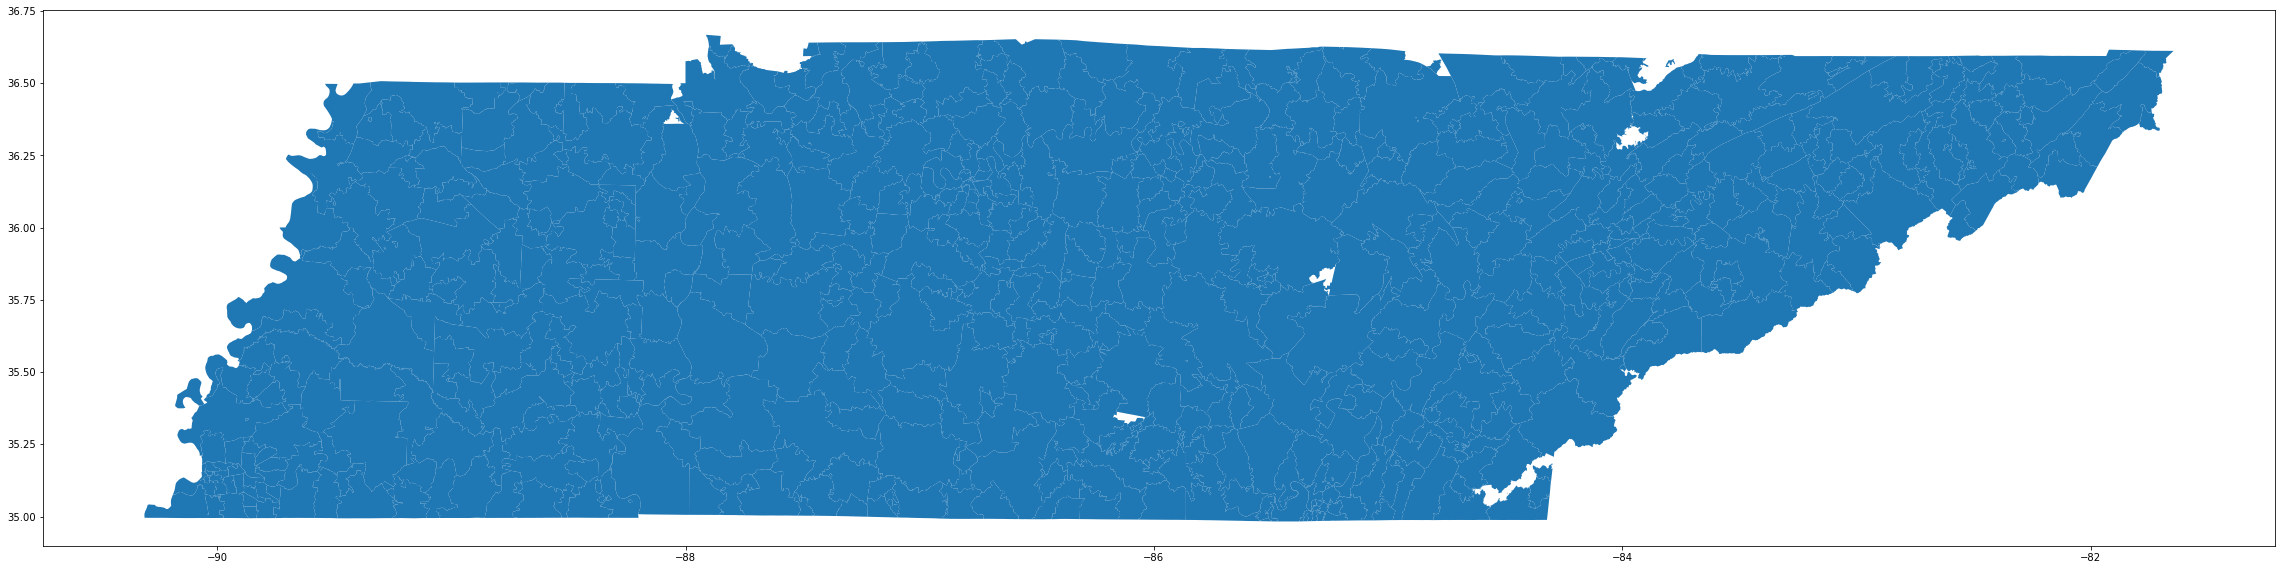

In [119]:
zips.plot(figsize=(40,20))
plt.show()

In [120]:
zips.head()

STATEFP10 ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  \
0        47     37710  4737710        B5   G6350          S  211712025   
1        47     37381  4737381        B5   G6350          S  360489702   
2        47     37701  4737701        B5   G6350          S   27309005   
3        47     37886  4737886        B5   G6350          S  113625372   
4        47     37757  4737757        B5   G6350          S   72942123   

   AWATER10   INTPTLAT10    INTPTLON10 PARTFLG10  \
0         0  +36.1586321  -084.3161341         N   
1  38482384  +35.6871804  -084.8769930         N   
2     28530  +35.7927401  -083.9860671         N   
3         0  +35.7455878  -083.8047184         N   
4   8907166  +36.2990089  -084.1372987         N   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [121]:
zips.columns

Index(['STATEFP10', 'ZCTA5CE10', 'GEOID10', 'CLASSFP10', 'MTFCC10',
       'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'PARTFLG10', 'geometry'],
      dtype='object')

In [122]:
zips.drop(['STATEFP10', 'GEOID10', 'CLASSFP10', 'MTFCC10',
       'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'PARTFLG10'], axis=1, inplace = True)

In [123]:
zip_combined_spat_norm.head()

zip_code  num_calls  Median_Income  zip_x        lat  zip_y  population  \
767     67260          1            NaN  67260  37.719376  67260         0.0   
259     30334          6            NaN  30334  33.748855  30334         0.0   
1154    63045          1            NaN  63045  38.769205  63045         0.0   
922     96850          1            NaN  96850  21.303768  96850         0.0   
203     37213         10            NaN  37213  36.166156  37213        40.0   

      norm_calls  
767          NaN  
259          NaN  
1154         NaN  
922          NaN  
203         0.25

In [124]:
#zip_combined_spat_norm.to_csv('zip_combined_spat_norm')

In [129]:
zips.columns

Index(['ZCTA5CE10', 'geometry'], dtype='object')

In [130]:
zip_combined_spat_norm.columns

Index(['zip_code', 'num_calls', 'Median_Income', 'zip_x', 'lat', 'zip_y',
       'population', 'norm_calls'],
      dtype='object')

In [132]:
zip_combined_spat_norm_tn = pd.read_csv('../Data/zip_combined_spat_norm_tn.csv',dtype={"zip_code":"string"})

In [133]:
zip_combined_spat_norm_tn.tail(20)

zip_code  num_calls  Median_Income  population  norm_calls
247    37402         50        18319.0      4100.0      0.0122
248    37729         24        52083.0      1937.0      0.0124
249    37211        945        59075.0     75199.0      0.0126
250    37212        295        71699.0     20672.0      0.0143
251    37408         37        63869.0      2033.0      0.0182
252    37210        313        36985.0     16810.0      0.0186
253    37207        770        50583.0     39151.0      0.0197
254    37075       1453        77320.0     68336.0      0.0213
255    37057         15        27899.0       660.0      0.0227
256    37866         36        61462.0      1508.0      0.0239
257    37012         50        49883.0      1954.0      0.0256
258    37115       1295        46777.0     39573.0      0.0327
259    37138        927        73710.0     23789.0      0.0390
260    37857        872        42103.0     20429.0      0.0427
261    37030        394        44531.0      7674.0      0.0513
262    38012       1125        38077.0     12658.0      0.0889
263    37307        441        58857.0      4806.0      0.0918
264    37201        261        92827.0      1745.0      0.1496
265    37219        172        85463.0      1043.0      0.1649
266    37213         10            NaN        40.0      0.2500

In [134]:
zip_combined_spat_norm.dtypes

zip_code          object
num_calls          int64
Median_Income    float64
zip_x             string
lat              float64
zip_y             string
population       float64
norm_calls       float64
dtype: object

In [135]:
zip_combined_spat_norm_tn.dtypes

zip_code          string
num_calls          int64
Median_Income    float64
population       float64
norm_calls       float64
dtype: object

In [136]:
merged = zips.merge(zip_combined_spat_norm_tn,
 left_on=['ZCTA5CE10'], 
 right_on=['zip_code'],
 how='left')

In [137]:
merged = merged.reset_index()

In [138]:
merged.head()

index ZCTA5CE10  \
0      0     37710   
1      1     37381   
2      2     37701   
3      3     37886   
4      4     37757   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

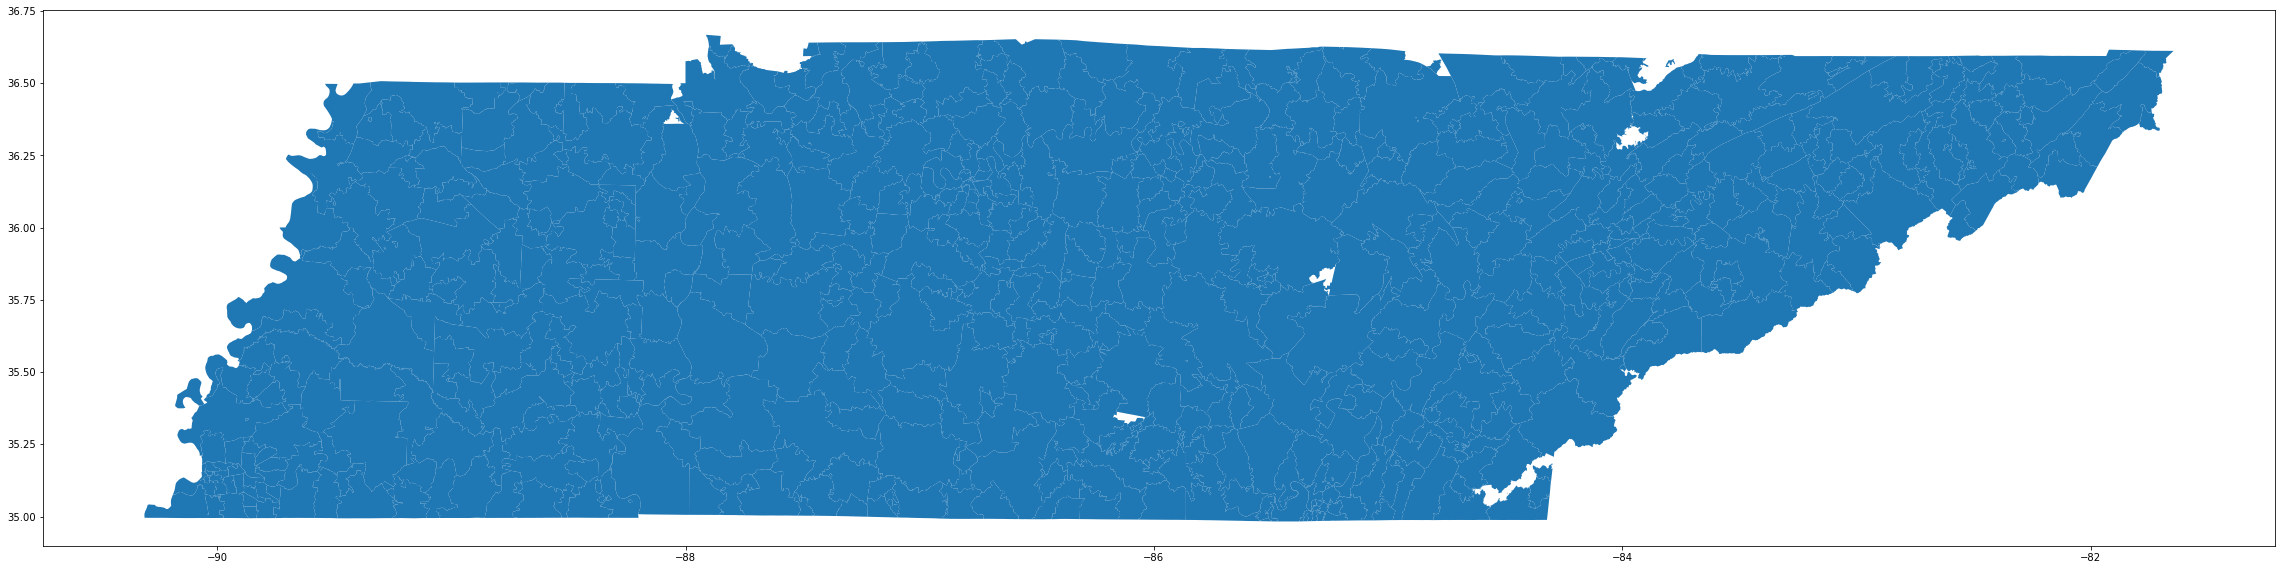

In [139]:
merged.plot(figsize=(40,20))
plt.show()

In [140]:
merged.columns

Index(['index', 'ZCTA5CE10', 'geometry', 'zip_code', 'num_calls',
       'Median_Income', 'population', 'norm_calls'],
      dtype='object')

In [141]:
merged.drop(['index', 'zip_code'], axis=1, inplace=True)

In [142]:
merged.head()

ZCTA5CE10  \
0     37710   
1     37381   
2     37701   
3     37886   
4     37757   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [143]:
merged[merged['norm_calls'] > .10]

ZCTA5CE10  \
23      37219   
25      37213   
255     37201   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [144]:
#merged = merged.fillna(0.0)

In [145]:
merged.head()

ZCTA5CE10  \
0     37710   
1     37381   
2     37701   
3     37886   
4     37757   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [146]:
zips.shape[0]

631

In [147]:
zip_combined_spat_norm_tn.shape[0]

267

In [148]:
merged.shape[0]

631

In [149]:
merged.norm_calls.min()

0.0

In [150]:
merged.norm_calls.mean()

0.0056433070866141735

In [151]:
merged.norm_calls.max()

0.25

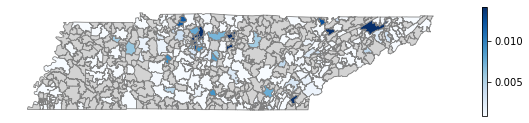

In [152]:
#visualize with matplotlib
merged.loc[np.random.choice(merged.index, 40), 'norm_calls'] = np.nan

fig, ax = plt.subplots(1, figsize=(10,2))
ax.axis('off')
plt.rcParams['axes.facecolor'] = 'grey'
#ax.set_title('CALL VOLUME / POPULATION BY ZIP CODE', fontdict={'fontsize':'16','fontweight':'3'})
color = 'Blues'
vmin, vcenter, vmax = merged.norm_calls.min(), merged.norm_calls.mean(), merged.norm_calls.max()
norm=plt.Normalize(vmin=.001, vmax=.014)
sm = plt.cm.ScalarMappable(cmap=color, norm=norm)
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=10)
#ax.set_facecolor('grey')
merged.plot('norm_calls', norm=norm, cmap=color, linewidth=0.8, ax=ax, edgecolor='grey', categorical=False, legend=False, missing_kwds={'color': 'lightgrey'}, figsize=(40,20))
plt.savefig('tn_normalized_calls.png', dpi=200, bbox_inches='tight', transparent=False)

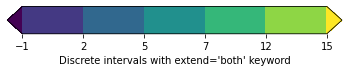

In [153]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.viridis
bounds = [-1, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

In [154]:
merged.to_csv('..\merged_zip_calls.csv')

In [155]:
bounds = [-1, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

In [156]:
merged.plot('norm_calls',cmap=color,linewidth=0.8, ax=ax, edgecolor='0.8',figsize=(40,20))

<AxesSubplot:xlabel="Discrete intervals with extend='both' keyword">

<Figure size 432x288 with 0 Axes>

In [157]:
plt.figure(figsize=((10,8)))
plt.plot(run_before, run_after, 'ro-')
plt.plot(walk_before, walk_after, 'bo-')
plt.show()

NameError: name 'run_before' is not defined

<Figure size 720x576 with 0 Axes>

In [ ]:
#fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Call Volume by Zip Code', fontdict={'fontsize': '40', 'fontweight' : '3'})

In [ ]:
color = 'BuPu'
vmin, vmax = .04, .25
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=40)

In [ ]:
fig, ax = plt.subplots(1, figsize=(40, 20))
merged.plot('num_calls', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20), categorical=False, legend=True)
ax.legend(loc=(1, .5),
          fontsize=15,
          frameon=False,
          title="LEGEND")
#plot.legend(loc=2, prop={'size': 6})

In [ ]:
fig, ax = plt.subplots(1, figsize=(40, 10))
mergedn.plot('norm_calls', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20), categorical=False, legend=True)
ax.legend(loc=(1, .5),
          fontsize=15,
          frameon=False,
          title="LEGEND",
          prop={'size': 1})